In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as DT
import yfinance as yf
import numpy as np 
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import pandas_market_calendars as mcal
import datetime
from mpl_toolkits.mplot3d import axes3d
import scipy as sp
import scipy.interpolate
from scipy.stats import norm
import math
from nelson_siegel_svensson.calibrate import calibrate_ns_ols 

In [2]:
@jit
def simGBMpath(nsim, s0, v, sd, deltat, tau,Z=-1):
  m = int(tau/deltat) #number of periods
  Smatrix = np.zeros((nsim, m+1))
 # print(m)
  if(type(Z)!=np.ndarray):
    Z = np.random.normal(0,1,size=(nsim, m))
  for i in range(nsim):
    Smatrix[i][0] = s0
    for j in range(1,m+1):
      logdiff = v*deltat - 0.5*(sd**2)*deltat + sd*np.sqrt(deltat)*Z[i][j-1]
      Smatrix[i][j] = Smatrix[i][j-1]*np.exp(logdiff)
  return Smatrix


NameError: name 'jit' is not defined

In [ ]:
file_path = "../Data CSV/SMI Historical Data.csv"
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

data['Price'] = data['Price'].str.replace(',', '').astype(float)

data['Log Return'] = np.log(data['Price'] / data['Price'].shift(1))

data = data.dropna(subset=['Log Return']).reset_index(drop=True)


print(data)

           Date     Price       Open       High        Low    Vol. Change %  \
0    2024-10-29  12100.57  12,252.26  12,253.41  12,098.69  26.00M   -1.12%   
1    2024-10-28  12237.97  12,230.43  12,254.80  12,155.96  17.27M    0.44%   
2    2024-10-25  12184.00  12,154.39  12,197.76  12,142.92  15.23M    0.09%   
3    2024-10-24  12173.04  12,174.20  12,224.63  12,169.08  19.38M    0.21%   
4    2024-10-23  12147.10  12,173.84  12,218.38  12,107.05  16.99M   -0.13%   
...         ...       ...        ...        ...        ...     ...      ...   
2719 2014-01-09   8295.90   8,341.20   8,362.80   8,283.48  46.59M   -0.68%   
2720 2014-01-08   8352.82   8,340.09   8,352.82   8,310.24  53.34M    0.40%   
2721 2014-01-07   8319.40   8,290.96   8,346.25   8,267.80  44.81M    0.57%   
2722 2014-01-06   8272.23   8,262.65   8,285.12   8,232.49  41.72M    0.02%   
2723 2014-01-03   8270.46   8,178.92   8,274.66   8,168.14  36.81M    0.82%   

      Log Return  
0       0.011171  
1       0.011

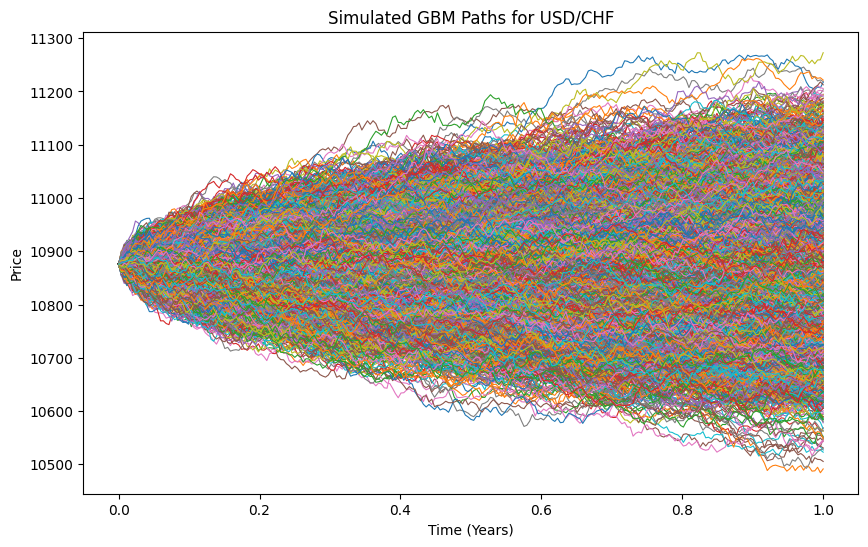

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mu = data['Log Return'].mean()
sigma = data['Log Return'].std()

S0 = data['Price'].iloc[300]  # Starting price (last observed price)
T = 1  # Time period (e.g., 1 year)
N = 252  # Number of time steps (e.g., trading days in a year)
dt = T / N  # Time increment
nsim = 100000

def simGBMpath(nsim, s0, mu, sigma, deltat, tau, Z=None):
    m = int(tau / deltat)  # number of periods
    Smatrix = np.zeros((nsim, m + 1))
    
    if Z is None:
        Z = np.random.normal(0, 1, size=(nsim, m))
        
    for i in range(nsim):
        Smatrix[i][0] = s0
        for j in range(1, m + 1):
            logdiff = mu * deltat - 0.5 * (sigma ** 2) * deltat + sigma * np.sqrt(deltat) * Z[i][j - 1]
            Smatrix[i][j] = Smatrix[i][j - 1] * np.exp(logdiff)
            
    return Smatrix

# Simulate GBM paths
simulated_paths = simGBMpath(nsim, S0, mu, sigma, dt, T)

# Plot a few of the simulated paths
plt.figure(figsize=(10, 6))
for i in range(10000):  # Plot 10 sample paths
    plt.plot(np.linspace(0, T, N + 1), simulated_paths[i, :], lw=0.8)
plt.xlabel("Time (Years)")
plt.ylabel("Price")
plt.title("Simulated GBM Paths")
plt.show()